# **DATA PRE-PROCESSING/PREPARATION**

Sebelum masuk pada data pre-processing, terlebih dahulu perlu meng-install dan meng-import packages berikut:

In [ ]:
#import libraries yang dibutuhkan
# Untuk meng-ignore warning yang muncul
import warnings
warnings.filterwarnings('ignore')

# Dapat digunakan untuk melakukan berbagai macam operasi matematika pada array.
import numpy as np

# data frame
import pandas as pd

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **UPLOAD DATA**

Langkah pertama yaitu memasukkan/input data yang akan digunakan. Dalam kasus kali ini yaitu data Telco Customer Churn, dimana data tersebut disimpan dalam bentuk file Comma Separated Value (.csv).

Banyak cara upload file yang dapat diguankan. Salah satu cara yang digunakan disini yaitu upload file langsung ke google.colab.
Caranya yaitu:
*   Buka menu File yang berada di sebelah kiri notebook
*   Klik kanan, pilih Upload
*   Pilih file yang akan digunakan
*   Lalu upload dan tunggu hingga proses selesai


Selanjutnya yaitu membaca file yang telah di upload menggunakan library `pandas` untuk membaca file csv, yaitu `pd.read_csv`. Disini dataframe didefinisikan sebagai `df_telco` seperti berikut

In [ ]:
df_telco = pd.read_csv('Data-Telco-Customer-Churn.csv') # Membaca file data (dalam format csv) yang telah di upload
# menampilkan sebagian dataframe telco

Untuk menampilkan sebagian data pertama pada dataset digunakan `df_telco.head()`, ini untuk menampilkan 5 baris pertama dari dataset

In [ ]:
df_telco.head() # menampilkan sebagian dataset (dari data teratas)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


##**DATASET INFORMATION**

Dilakukan untuk mengetahui informasi tentang dataframe yang akan digunakan

In [ ]:
df_telco.shape # Melihat dimensi dataframe (n, m) dimana terdiri dari n baris dan m kolom)

(7043, 21)

> Berdasarkan hasil running, diketahui bahwa data terdiri atas 7043 rows dan 21 column

In [ ]:
df_telco.size # Mengetahui jumlah data/ cell yang dimiliki oleh data frame

147903

> Berdasarkan hasil running diketahui bahwa dataset/dataframe memiliki 147903 titik data/ cell

In [ ]:
df_telco.info() # Mengetahui informasi tiap variabel mengenai missing value dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_telco.dtypes # Mengetahui tipe data pada masing-masing variabel

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

> Berdasarkan output tersebut, diketahui bahwa terdapat 2 variabel merupakan integer(int64), 1 variabel float(float64) dan 18 variabel merupakan objek(object)

> Namun, perlu diperhatikan bahwa pada variabel TotalCharges memiliki tipe objek. Padahal jika dilihat pada data, variabel tersebut tidak berisi data kategorik tetapi data numerik. Sehingga perlu untuk mengubah tipe data.

In [ ]:
#Merubah type data pada TotalCharges dari Object menjadi numeric
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [ ]:
# Melihat kembali tipe data
df_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

> Berdasarkan hasil running code, dapat terlihat bahwa tipe data variabel TotalCharges telah berubah menjadi float

> Code tersebut digunakan untuk mendeskripsikan data numeric (Senior Citizen, tenure, MonthlyCharges, dan Total Charges.  dalam dataset diantaranya yaitu jumlah data (count), mean, std (standar deviasi), nilai min, nilai max dan Q1, Q2, Q3 (Quartile)

## **MISSING VALUE CHECKING**

In [ ]:
df_telco.isnull().sum() #Melihat apakah ada missing values (Null/NaN) pada masing-masing variabel/kolom

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> Berdasarkan hasil missing value checking, diketahui bahwa terdapat 11 data yang hilang atau missing value, sehingga perlu dilakukan missing value handling

## **MISSING VALUE HANDLING**

Pertama, kita perlu melihat data yang hilang pada variabel TotalCharges

In [ ]:
df_telco[df_telco['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


> Jika diperhatikan, pada variabel tenure memiliki nilai 0. sedangkan

In [ ]:
df_telco[df_telco['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Missing Value Handling
df_telco=df_telco.dropna(subset=['TotalCharges'])

In [ ]:
# Melihat Kembali Jumlah Missing Value
df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


> Setelah dicek kembali, terlihat bahwa pada dataset sudah sepenuhnya tidak ada missing value

## **CATEGORICAL DATA ENCODING**

In [ ]:
# Mengetahui jumlah dan apa saja variabel kategorik dalam dataset
categorical = [var for var in df_telco.columns if df_telco[var].dtype=='O'] # Data kategorik yaitu data yang memiliki tipe Object atau 'O'
jumlah_categorical=len(categorical)
print('Terdapat variabel kategorik sebanyak :') # print text
print(jumlah_categorical) # print jumlah variabel kategorik
print('Variabel categorical terdiri atas :') # print text
print(categorical) # print nama variabel kategorik

Terdapat variabel kategorik sebanyak :
17
Variabel categorical terdiri atas :
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


> Code diatas digunakan untuk mengetahui jumlah dan apa saja variabel kategorik yang terdapat pada dataset yaitu variabel yang memiliki tipe data 'o' atau object.
Berdasarkan hasil running, terdapat 17 variabel kategorik diantaranya yaitu: 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'

> Namun karena 'customerID' merupakan Unique ID/Key maka tidak masuk sebagai variabel kategorik sehingga jumlah akhir variabel kategorik ada 16

In [ ]:
# Menampilkan sebagian data dari variabel kategorik
df_telco[categorical].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
# Digunakan untuk menghitung jumlah kategori pada tiap variabel data kategorik
for var in categorical:
    print(df_telco[var].value_counts())
    print()

7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64

Male      3549
Female    3483
Name: gender, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, 

In [ ]:
# Menghitung jumlah kategori/label pada tiap variabel
for var in categorical:
    print(var, ' contains ', len(df_telco[var].unique()), ' labels')

customerID  contains  7032  labels
gender  contains  2  labels
Partner  contains  2  labels
Dependents  contains  2  labels
PhoneService  contains  2  labels
MultipleLines  contains  3  labels
InternetService  contains  3  labels
OnlineSecurity  contains  3  labels
OnlineBackup  contains  3  labels
DeviceProtection  contains  3  labels
TechSupport  contains  3  labels
StreamingTV  contains  3  labels
StreamingMovies  contains  3  labels
Contract  contains  3  labels
PaperlessBilling  contains  2  labels
PaymentMethod  contains  4  labels
Churn  contains  2  labels


> Code tersebut digunakan untuk mengetahui jumlah label/ kategori pada tiap variabel data kategorik.
Berdasarkan hasil running, terdapat 6 variabel yang memiliki 2 labels, 9 variabel yang memiliki 3 labels, dan 1 variabel yang memiliki 4 labels.

> *Variabel customerID tidak termasuk data kategorik, skarena sebagai Unique ID/Key*

In [ ]:
# Pemberian kode pada tiap label menggunakan label_encoder.fit_transform
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_telco['gender'] = label_encoder.fit_transform(df_telco['gender'])
df_telco['Partner'] = label_encoder.fit_transform(df_telco['Partner'])
df_telco['Dependents'] = label_encoder.fit_transform(df_telco['Dependents'])
df_telco['PhoneService'] = label_encoder.fit_transform(df_telco['PhoneService'])
df_telco['MultipleLines'] = label_encoder.fit_transform(df_telco['MultipleLines'])
df_telco['InternetService'] = label_encoder.fit_transform(df_telco['InternetService'])
df_telco['OnlineSecurity'] = label_encoder.fit_transform(df_telco['OnlineSecurity'])
df_telco['OnlineBackup'] = label_encoder.fit_transform(df_telco['OnlineBackup'])
df_telco['DeviceProtection'] = label_encoder.fit_transform(df_telco['DeviceProtection'])
df_telco['TechSupport'] = label_encoder.fit_transform(df_telco['TechSupport'])
df_telco['StreamingTV'] = label_encoder.fit_transform(df_telco['StreamingTV'])
df_telco['StreamingMovies'] = label_encoder.fit_transform(df_telco['StreamingMovies'])
df_telco['Contract'] = label_encoder.fit_transform(df_telco['Contract'])
df_telco['PaperlessBilling'] = label_encoder.fit_transform(df_telco['PaperlessBilling'])
df_telco['PaymentMethod'] = label_encoder.fit_transform(df_telco['PaymentMethod'])
df_telco['Churn'] = label_encoder.fit_transform(df_telco['Churn'])
df_telco.head() # Menampilkan data hasil pelabelan/encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


> Alasan menggunakan pelabelan ini yaitu karena ...

## **ANOMALIES & OURLIER**

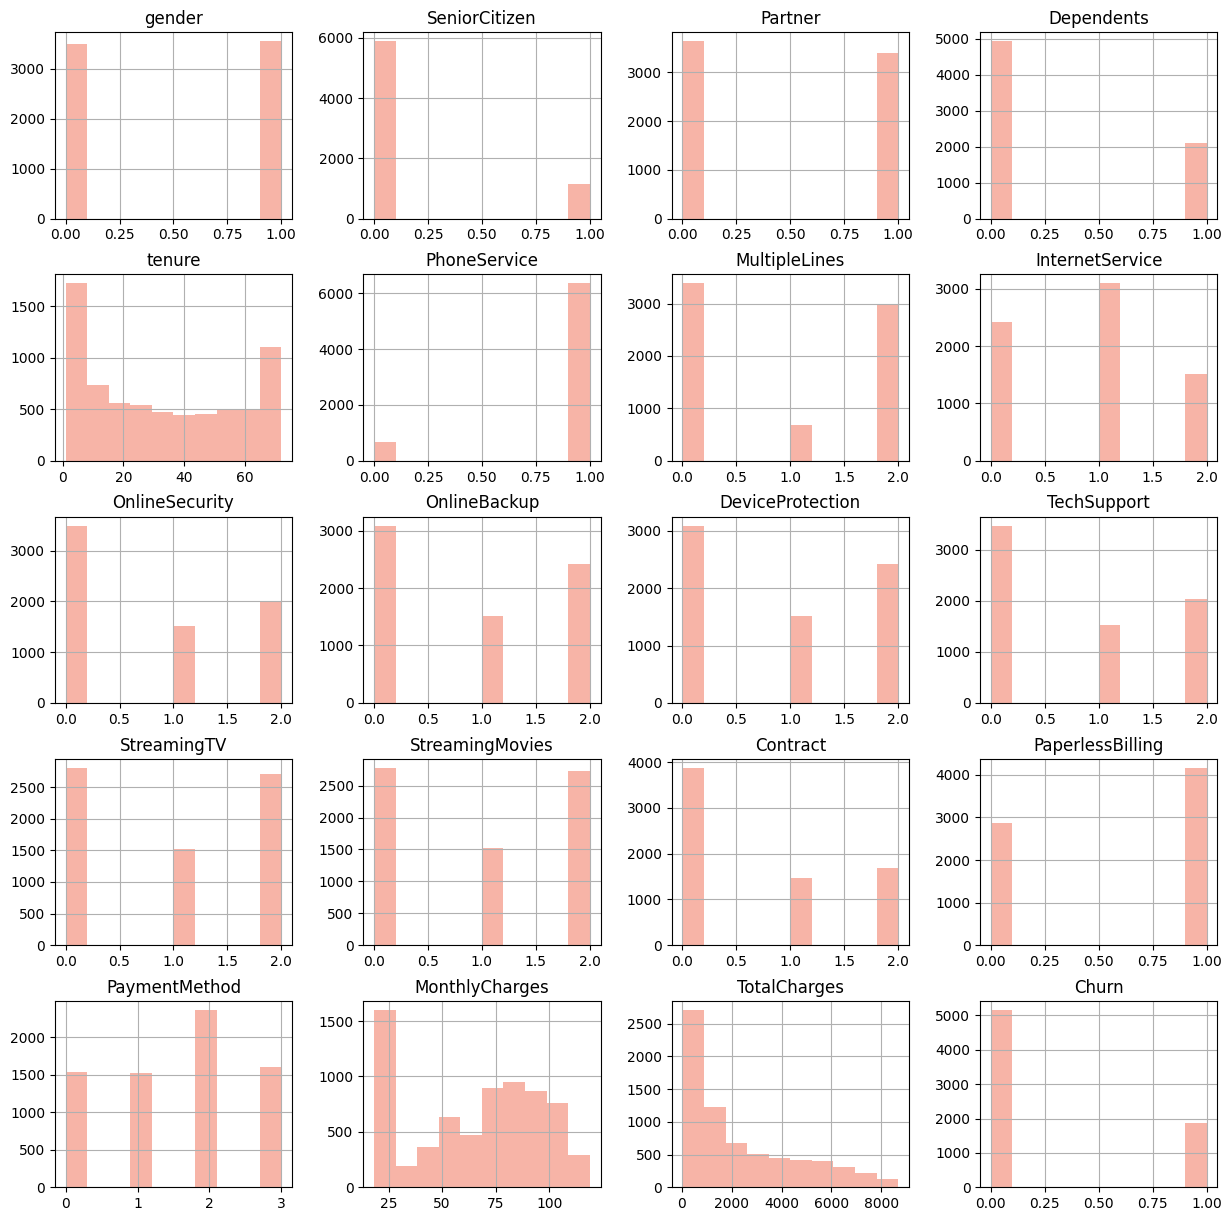

In [ ]:
# Melihat Persebaran Data Menggunakan Histogram
histogram = df_telco.hist(figsize = (15,15), color='#F7B4A7')

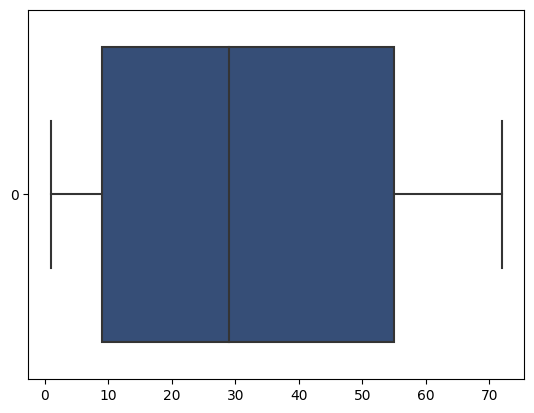

In [ ]:
# Outlier & Anomaly Checking : Untuk mengetahui apakah terdapat outlier atau anomaly pada variabel tenure
boxplot_tenure = sns.boxplot(df_telco['tenure'],color='#2B4B82',orient='h')

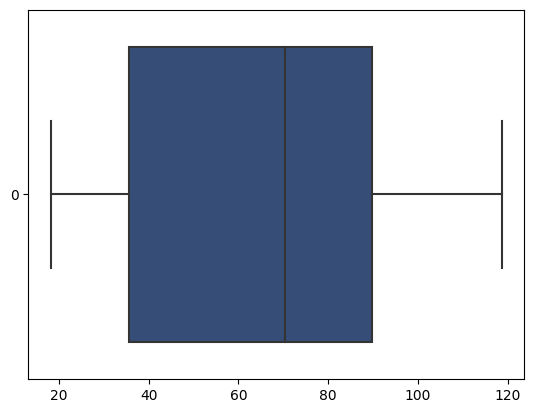

In [ ]:
# Outlier & Anomaly Checking : Untuk mengetahui apakah terdapat outlier atau anomaly pada variabel MonthlyCharges
boxplot_MonthlyCharges = sns.boxplot(df_telco['MonthlyCharges'],color='#2B4B82',orient='h')

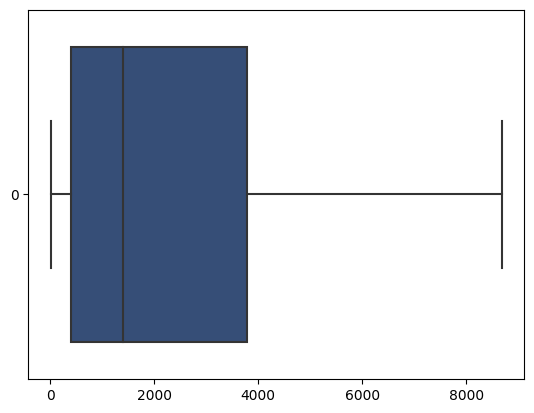

In [ ]:
# Outlier & Anomaly Checking : Untuk mengetahui apakah terdapat outlier atau anomaly pada variabel TotalCharges
boxplot_TotalCharges = sns.boxplot(df_telco['TotalCharges'],color='#2B4B82',orient='h')

Berdasarkan boxplot, tidak terlihat adanya outlier pada variabel numeric tenure, MonthlyCharges, dan TotalCharges

<Axes: ylabel='TotalCharges'>

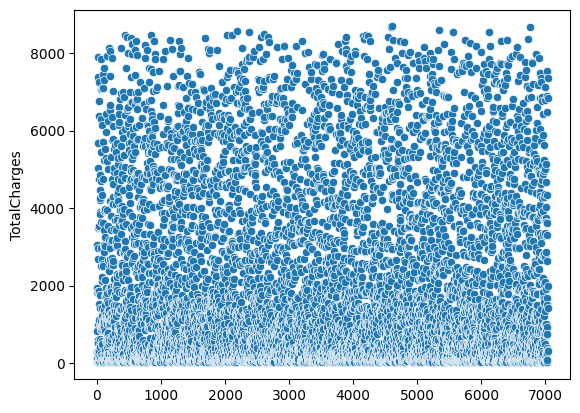

In [ ]:
# Melihat Persebaran Data Pada Variabel TotalCharges menggunakan scatterplot
sns.scatterplot(df_telco['TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Density'>

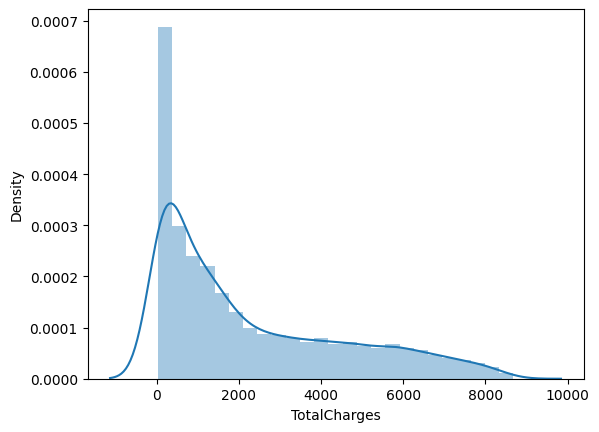

In [ ]:
# Melihat persebaran data dan skewness pada variabel TotalCharges menggunakan distplot
sns.distplot(df_telco['TotalCharges'])

In [ ]:
# Mendeskripsikan data numerik dalam dataset
df_telco.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [ ]:
#Outlier Checking dengan IQR
Q1 = df_telco['TotalCharges'].quantile(0.25)
Q3 = df_telco['TotalCharges'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)
print('upper bound = ', upper_bound)
print('lower bound = ', lower_bound)

upper bound =  8884.66875
lower bound =  -4688.481250000001
